# TASK - 3 Car price prediction using Machine Learning


In [3]:
#Import required modules
import numpy as np
import pandas as pd
import warnings

In [7]:
#Reading the dataset
data=pd.read_csv('/Users/karthikkumar/Desktop/DS/CarPrice_Assignment.csv')
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [8]:
data.shape

(205, 26)

In [9]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [10]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [12]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Train the model

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x=data.iloc[:, :-1]
x

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,six,145,idi,3.01,3.40,23.0,106,4800,26,27


In [15]:
y=data.iloc[:, -1]
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [17]:
x_train

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
141,142,0,subaru,gas,std,four,sedan,fwd,front,97.2,...,four,108,2bbl,3.62,2.64,9.5,82,4800,32,37
26,27,1,dodge colt (sw),gas,std,four,sedan,fwd,front,93.7,...,four,90,2bbl,2.97,3.23,9.4,68,5500,31,38
77,78,2,mitsubishi lancer,gas,std,two,hatchback,fwd,front,93.7,...,four,92,2bbl,2.97,3.23,9.4,68,5500,31,38
184,185,2,volkswagen model 111,diesel,std,four,sedan,fwd,front,97.3,...,four,97,idi,3.01,3.40,23.0,52,4800,37,46
118,119,1,plymouth fury iii,gas,std,two,hatchback,fwd,front,93.7,...,four,90,2bbl,2.97,3.23,9.4,68,5500,37,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,130,1,porsche cayenne,gas,std,two,hatchback,rwd,front,98.4,...,eight,203,mpfi,3.94,3.11,10.0,288,5750,17,28
197,198,-1,volvo 245,gas,std,four,wagon,rwd,front,104.3,...,four,141,mpfi,3.78,3.15,9.5,114,5400,24,28
183,184,2,volkswagen 1131 deluxe sedan,gas,std,two,sedan,fwd,front,97.3,...,four,109,mpfi,3.19,3.40,9.0,85,5250,27,34
174,175,-1,toyota celica gt,diesel,turbo,four,sedan,fwd,front,102.4,...,four,110,idi,3.27,3.35,22.5,73,4500,30,33


In [18]:
x_test

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
82,83,3,mitsubishi outlander,gas,turbo,two,hatchback,fwd,front,95.9,...,four,156,spdi,3.58,3.86,7.0,145,5000,19,24
76,77,2,mitsubishi mirage,gas,std,two,hatchback,fwd,front,93.7,...,four,92,2bbl,2.97,3.23,9.4,68,5500,37,41
102,103,0,nissan fuga,gas,std,four,wagon,fwd,front,100.4,...,six,181,mpfi,3.43,3.27,9.0,152,5200,17,22
71,72,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,115.6,...,eight,234,mpfi,3.46,3.10,8.3,155,4750,16,18
185,186,2,volkswagen type 3,gas,std,four,sedan,fwd,front,97.3,...,four,109,mpfi,3.19,3.40,9.0,85,5250,27,34
105,106,3,nissan kicks,gas,turbo,two,hatchback,rwd,front,91.3,...,six,181,mpfi,3.43,3.27,7.8,200,5200,17,23
191,192,0,volkswagen rabbit,gas,std,four,sedan,fwd,front,100.4,...,five,136,mpfi,3.19,3.40,8.5,110,5500,19,24
134,135,3,saab 99le,gas,std,two,hatchback,fwd,front,99.1,...,four,121,mpfi,2.54,2.07,9.3,110,5250,21,28
14,15,1,bmw z4,gas,std,four,sedan,rwd,front,103.5,...,six,164,mpfi,3.31,3.19,9.0,121,4250,20,25


In [19]:
y_train

141     7126.0
26      7609.0
77      6189.0
184     7995.0
118     5572.0
        ...   
129    31400.5
197    16515.0
183     7975.0
174    10698.0
122     7609.0
Name: price, Length: 164, dtype: float64

In [20]:
y_test

1      16500.0
82     12629.0
76      5389.0
102    14399.0
71     34184.0
185     8195.0
105    19699.0
191    13295.0
134    15040.0
14     24565.0
11     16925.0
195    13415.0
165     9298.0
33      6529.0
34      7129.0
69     28176.0
99      8949.0
187     9495.0
179    15998.0
83     14869.0
200    16845.0
150     5348.0
45      8916.5
61     10595.0
111    15580.0
18      5151.0
89      5499.0
189    11595.0
93      7349.0
90      7099.0
121     6692.0
110    13860.0
6      17710.0
91      6649.0
116    17950.0
47     32250.0
135    15510.0
204    22625.0
194    12940.0
170    11199.0
92      6849.0
Name: price, dtype: float64

In [21]:
x_train = x_train.iloc[:, 1:]
x_test = x_test.iloc[:, 1:]

In [22]:
x_train["CarName"].value_counts()

toyota corolla              6
toyota corona               5
subaru dl                   4
mitsubishi mirage g4        3
honda civic                 3
                           ..
vokswagen rabbit            1
honda civic (auto)          1
saab 99le                   1
honda accord lx             1
plymouth fury gran sedan    1
Name: CarName, Length: 122, dtype: int64

In [23]:
make_train = x_train["CarName"].str.split(" ", expand = True)
make_test = x_test["CarName"].str.split(" ", expand = True)

In [24]:
x_train["Manufacturer"] = make_train[0]
x_test["Manufacturer"] = make_test[0]
     


# VISUALIZE


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


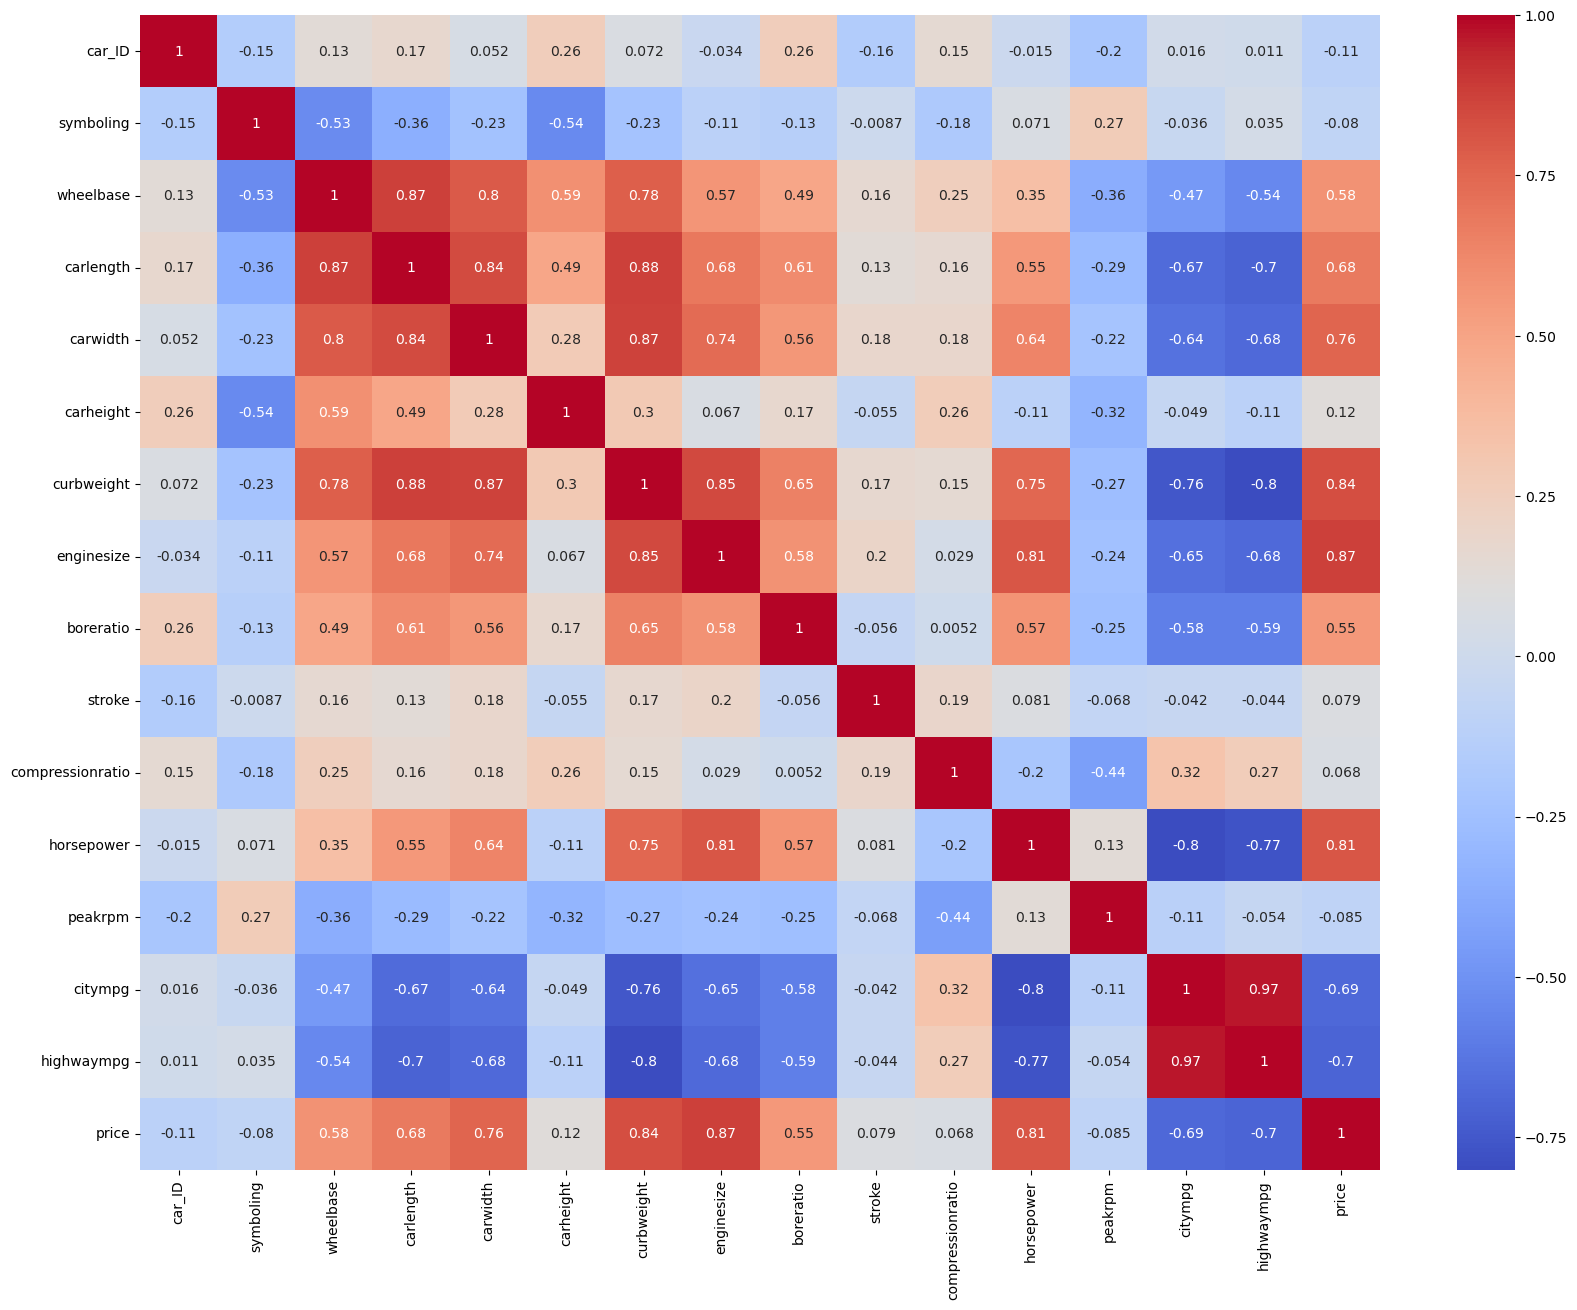

In [26]:
plt.figure(figsize=(20, 15))
correlations = data.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

/Users/karthikkumar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


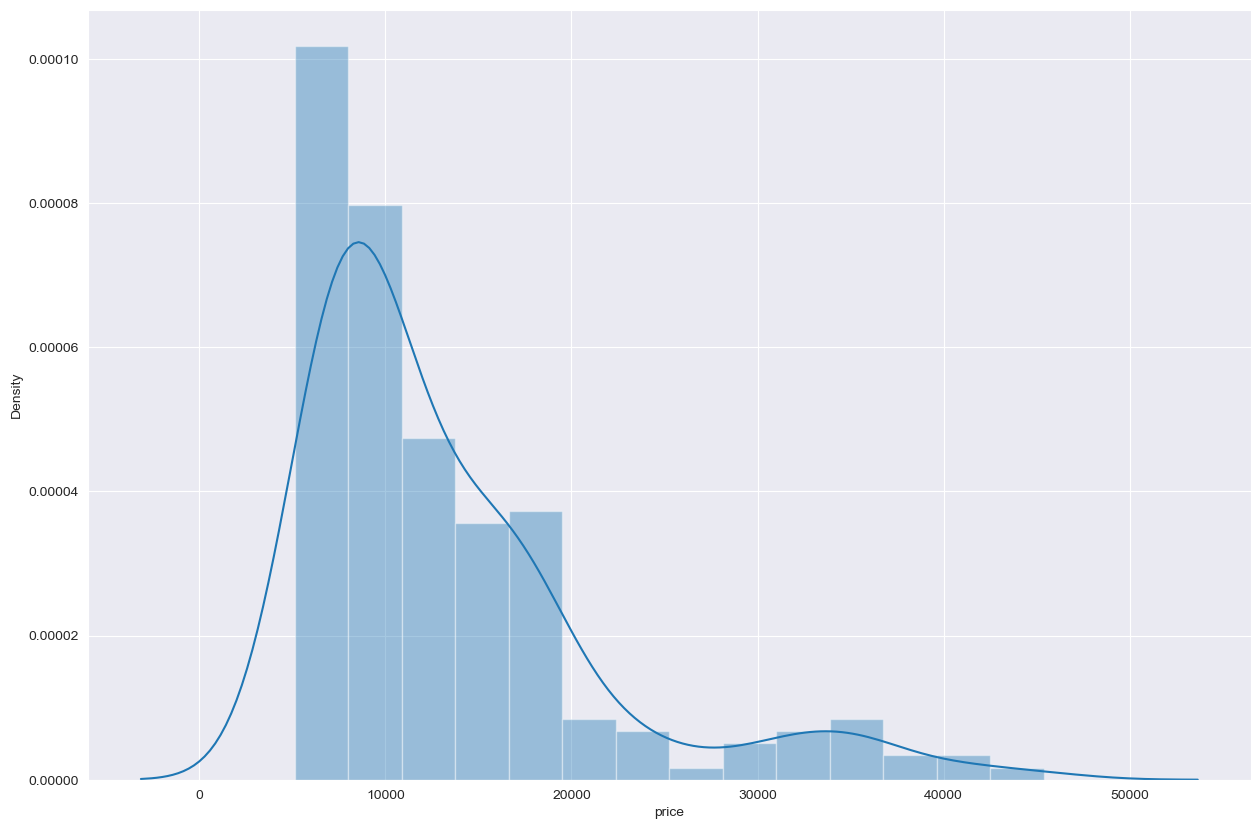

In [27]:
sns.set_style("darkgrid")
plt.figure(figsize=(15, 10))
sns.distplot(data.price)
plt.show()

Text(0, 0.5, 'Count of cars')

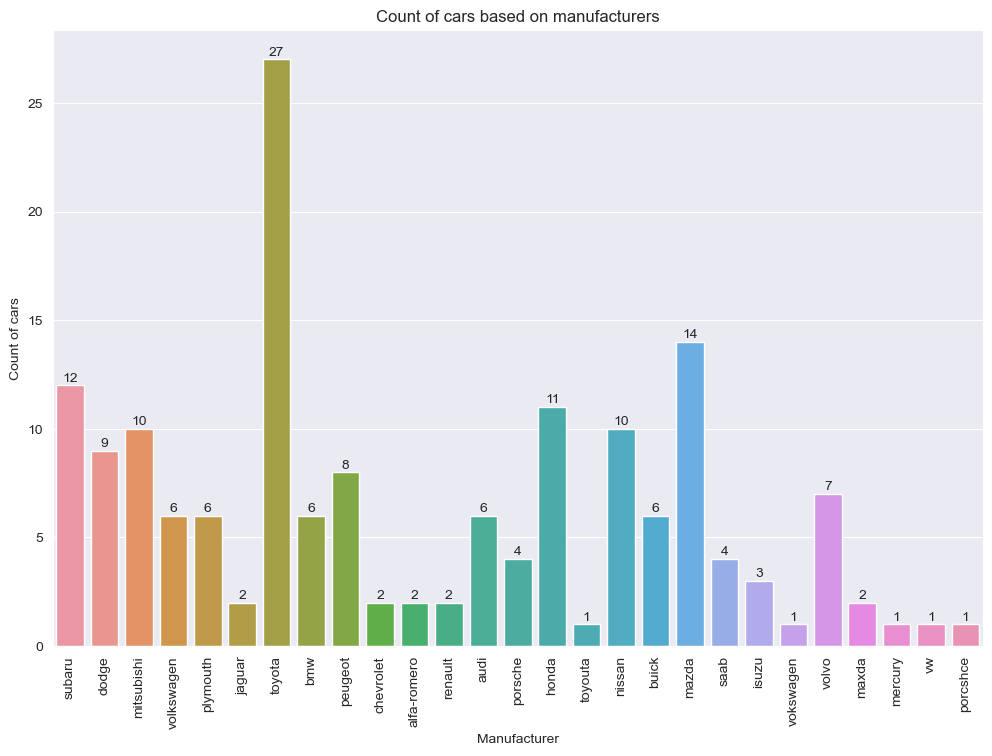

In [28]:
plt.figure(figsize=(12,8))
plot=sns.countplot(x='Manufacturer',data=x_train)
plt.xticks(rotation=90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

# Train a car prediction

In [29]:
x_train.drop("CarName", axis = 1, inplace = True)
x_test.drop("CarName", axis = 1, inplace = True)


In [30]:
x_train.drop('fueltype',axis=1,inplace=True)
x_test.drop('fueltype',axis=1,inplace=True)

In [31]:
x_train.drop("aspiration", axis = 1, inplace = True)
x_test.drop("aspiration", axis = 1, inplace = True)
     

x_train.drop("doornumber", axis = 1, inplace = True)
x_test.drop("doornumber", axis = 1, inplace = True)
     

x_train.drop("carbody", axis = 1, inplace = True)
x_test.drop("carbody", axis = 1, inplace = True)
     

x_train.drop("drivewheel", axis = 1, inplace = True)
x_test.drop("drivewheel", axis = 1, inplace = True)
     

x_train.drop("enginelocation", axis = 1, inplace = True)
x_test.drop("enginelocation", axis = 1, inplace = True)
     

x_train.drop("enginetype", axis = 1, inplace = True)
x_test.drop("enginetype", axis = 1, inplace = True)
     

x_train.drop("cylindernumber", axis = 1, inplace = True)
x_test.drop("cylindernumber", axis = 1, inplace = True)

In [32]:
x_train['boreratio']

141    3.62
26     2.97
77     2.97
184    3.01
118    2.97
       ... 
129    3.94
197    3.78
183    3.19
174    3.27
122    2.97
Name: boreratio, Length: 164, dtype: float64

In [33]:
x_train['stroke']

141    2.64
26     3.23
77     3.23
184    3.40
118    3.23
       ... 
129    3.11
197    3.15
183    3.40
174    3.35
122    3.23
Name: stroke, Length: 164, dtype: float64

In [34]:
x_train['compressionratio']

141     9.5
26      9.4
77      9.4
184    23.0
118     9.4
       ... 
129    10.0
197     9.5
183     9.0
174    22.5
122     9.4
Name: compressionratio, Length: 164, dtype: float64

In [35]:
x_train['horsepower']

141     82
26      68
77      68
184     52
118     68
      ... 
129    288
197    114
183     85
174     73
122     68
Name: horsepower, Length: 164, dtype: int64

In [36]:
x_train['peakrpm']

141    4800
26     5500
77     5500
184    4800
118    5500
       ... 
129    5750
197    5400
183    5250
174    4500
122    5500
Name: peakrpm, Length: 164, dtype: int64

In [37]:
x_train['citympg']

141    32
26     31
77     31
184    37
118    37
       ..
129    17
197    24
183    27
174    30
122    31
Name: citympg, Length: 164, dtype: int64

In [38]:
x_train['highwaympg']

141    37
26     38
77     38
184    46
118    41
       ..
129    28
197    28
183    34
174    33
122    38
Name: highwaympg, Length: 164, dtype: int64

In [39]:
x_train["curbweight"]


141    2145
26     1989
77     1944
184    2264
118    1918
       ... 
129    3366
197    3042
183    2209
174    2480
122    2191
Name: curbweight, Length: 164, dtype: int64

In [40]:
x_train['wheelbase']

141     97.2
26      93.7
77      93.7
184     97.3
118     93.7
       ...  
129     98.4
197    104.3
183     97.3
174    102.4
122     93.7
Name: wheelbase, Length: 164, dtype: float64

In [41]:
x_train = pd.get_dummies(x_train,
                         columns = ["Manufacturer","enginesize", "boreratio","stroke", "compressionratio", "horsepower", "peakrpm", "citympg"],
                         drop_first = True)
     

x_test = pd.get_dummies(x_test,
                         columns = ["Manufacturer","enginesize", "boreratio","stroke", "compressionratio", "horsepower", "peakrpm", "citympg"],
                         drop_first = True)

In [42]:
x_train


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,fuelsystem,highwaympg,Manufacturer_audi,Manufacturer_bmw,...,citympg_29,citympg_30,citympg_31,citympg_32,citympg_33,citympg_34,citympg_36,citympg_37,citympg_38,citympg_49
141,0,97.2,172.0,65.4,52.5,2145,2bbl,37,0,0,...,0,0,0,1,0,0,0,0,0,0
26,1,93.7,157.3,63.8,50.6,1989,2bbl,38,0,0,...,0,0,1,0,0,0,0,0,0,0
77,2,93.7,157.3,64.4,50.8,1944,2bbl,38,0,0,...,0,0,1,0,0,0,0,0,0,0
184,2,97.3,171.7,65.5,55.7,2264,idi,46,0,0,...,0,0,0,0,0,0,0,1,0,0
118,1,93.7,157.3,63.8,50.8,1918,2bbl,41,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,1,98.4,175.7,72.3,50.5,3366,mpfi,28,0,0,...,0,0,0,0,0,0,0,0,0,0
197,-1,104.3,188.8,67.2,57.5,3042,mpfi,28,0,0,...,0,0,0,0,0,0,0,0,0,0
183,2,97.3,171.7,65.5,55.7,2209,mpfi,34,0,0,...,0,0,0,0,0,0,0,0,0,0
174,-1,102.4,175.6,66.5,54.9,2480,idi,33,0,0,...,0,1,0,0,0,0,0,0,0,0


In [43]:
x_train.drop('fuelsystem',axis=1,inplace=True)
x_test.drop('fuelsystem',axis=1,inplace=True)

# Linear Regression model


In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
missing_cols = set(x_train.columns) - set(x_test.columns)
for col in missing_cols:
    x_test[col] = 0
x_test = x_test[x_train.columns]

/var/folders/s8/7qxp6m457nsc8z43sp3mgmvm0000gn/T/ipykernel_60796/4198726006.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[col] = 0
/var/folders/s8/7qxp6m457nsc8z43sp3mgmvm0000gn/T/ipykernel_60796/4198726006.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[col] = 0
/var/folders/s8/7qxp6m457nsc8z43sp3mgmvm0000gn/T/ipykernel_60796/4198726006.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining 

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [47]:
standardScaler = StandardScaler()
standardScaler.fit(x_train)
x_train = standardScaler.transform(x_train)
x_test = standardScaler.transform(x_test)   

In [48]:
linearRegression = LinearRegression()
linearRegression.fit(x_train, y_train)
y_pred = linearRegression.predict(x_test)
r2_score(y_test, y_pred)

-4.194531318827792e+26

# Random Forest Regressor

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
r2_score(y_test, y_pred)

0.8890484494601466

In [51]:
predict = "price"
data = data[["symboling", "wheelbase", "carlength", 
             "carwidth", "carheight", "curbweight", 
             "enginesize", "boreratio", "stroke", 
             "compressionratio", "horsepower", "peakrpm", 
             "citympg", "highwaympg", "price"]]
x = np.array(data.drop([predict], 1))
y = np.array(data[predict])

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

from sklearn.metrics import mean_absolute_error
model.score(x_test, predictions)

/var/folders/s8/7qxp6m457nsc8z43sp3mgmvm0000gn/T/ipykernel_60796/3297367717.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(data.drop([predict], 1))


1.0